# Assignment - Preface
For better viewing experience, Please access Colab Link : https://colab.research.google.com/drive/1yXH6b9oJQ5jD7uMQBf7ptxv3t7EaimxU
<br/>
I am trying to develop a kernel which can detect edges from image. So these kernel/filters are also termed as feature extractors. In current usecase, I am trying to extract edges from images.

## Helper Functions

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

## Read & Plot Image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

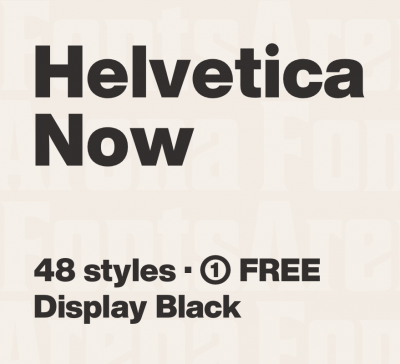

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

## Canny Edge Detector

In [0]:
edges = cv2.Canny(image,100,200)

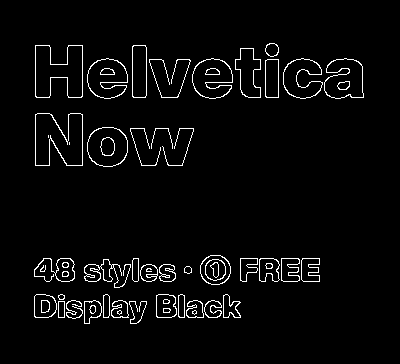

In [0]:
cv2_imshow(edges)

# Edge Detectors

---



# Vertical Edge Detector

## The Journey

Here we are convolving image with a kernel of 3*3.
I read couple of references to understand more on this concept.
It was really interesting to know, this matrix is a **Prewitt Operator**. 
Prewitt is a edge detection algorithm which identifies both vertical and horizontal edges.
Below is a vertical edge detector

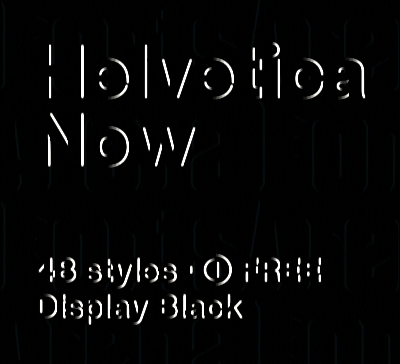

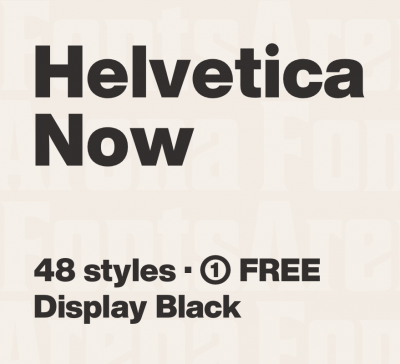

In [0]:
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
cv2_imshow(image)


But, if you see above convolved image, it does not show all the vertical edges. For example, Only right most edges are shown for 'H' letter.

Precisely to say, **above edge detector finds edges when there is a edge that has transition from dark to bright pixels**

Was checking the fundamentals and understood, if you use below matrix then it shows the other vertical edges

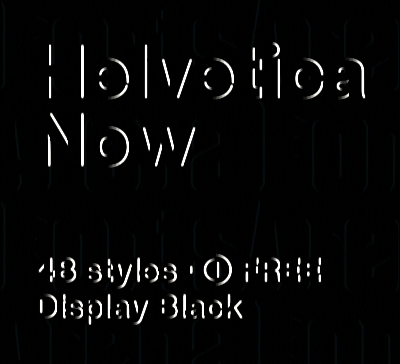

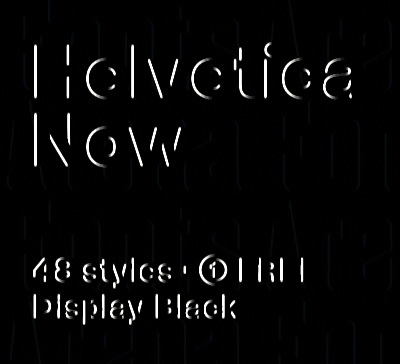

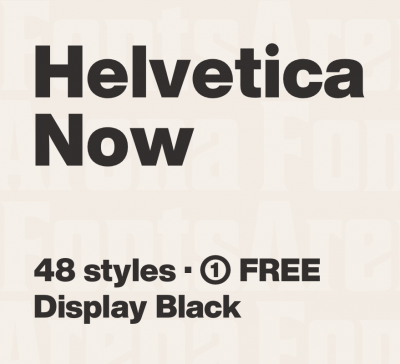

In [0]:
# Initial Vertical Edge Detection
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


# New Vertical Edge Detection
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

cv2_imshow(image)

## Final Vertical Edge Detection
Combining both the above vertical edge detected images, so that Whole vertical edges are detected.



*   **Without background edges**



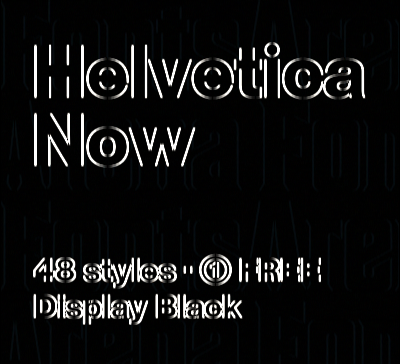

In [0]:
kernel1 = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])
kernel2 = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)



*   **With background Edges**
<br/>
Read about Sobel operator, where it weighs the edges so that edges will be more prominent than the original image.
We should try that if we want to see the edges of background texts as well.




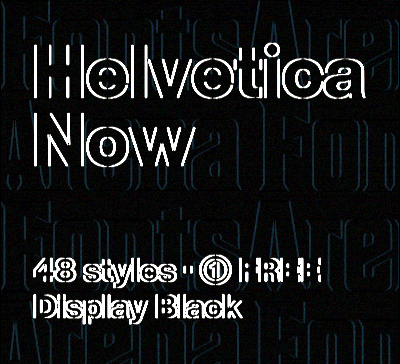

In [0]:
# As per the sobel concept, I tried to increase the weight of middle values in the kernel
kernel1 = np.float32([[1,0,-1],[10,0,-10],[1,0,-1]])
kernel2 = np.float32([[-1,0,1],[-10,0,10],[-1,0,1]])


dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)

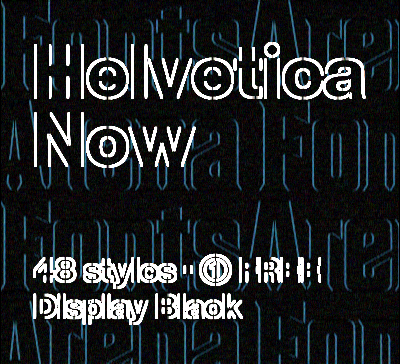

In [0]:
# Trying my own way, where increasing values of all pixels
kernel1 = np.float32([[10,0,-10],[10,0,-10],[10,0,-10]])
kernel2 = np.float32([[-10,0,10],[-10,0,10],[-10,0,10]])


dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)

## Conclusion on Vertical Edges Detectors

    

*   When we use Pre-witt operator matrix where alues are in range of -1 to 1, we used to get prominent edges visible in the image. 
*  There are two verticals we can get by swapping -1 and 1, one with transition from dark to bright pixels and other viceversa. Combining both images gives us a full vertical edge detected image.
* Sobel operator is also useful when we have to highligh the edges.
* Combining ideas of Prewitt and Sobel Operator, Played with all values and it gave more highlight to the vertical edges including background texts.



## References


*   https://en.wikipedia.org/wiki/Prewitt_operator
*   https://www.tutorialspoint.com/dip/sobel_operator.htm
*   https://www.youtube.com/watch?v=XuD4C8vJzEQ



# Horizontal Edge Detector


**Note: ** We will be following same way as of above section 'Vertical Edge Detector'. <br/>*If you feel like, it is redundant, please skip to **Final output** and **Conclusion**.*

## The Journey

Same like vertical edge detection, here we are convolving image with a kernel of 3*3.
As discussed already, this matrix is a **Prewitt Operator**. 
Prewitt is a edge detection algorithm which identifies both vertical and horizontal edges.
Below is a horizontal edge detector

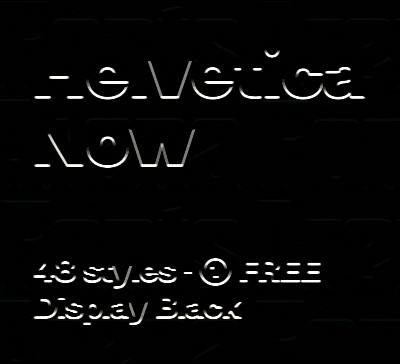

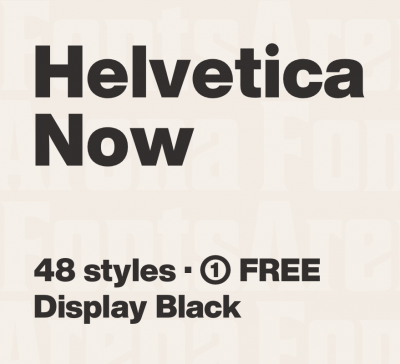

In [0]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
cv2_imshow(image)


But, if you see above convolved image, it does not show all the horiozontal edges. For example, Only right most edges are shown for 'H' letter.

Precisely to say, **above edge detector finds edges when there is a edge that has transition from dark to bright pixels**

Lets use below matrix to show the other horizontal edges

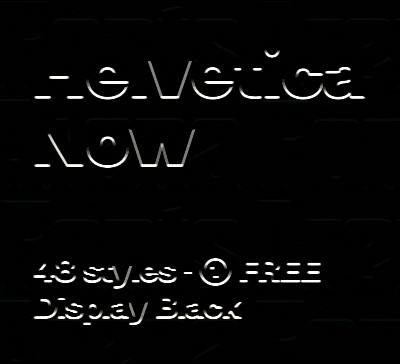

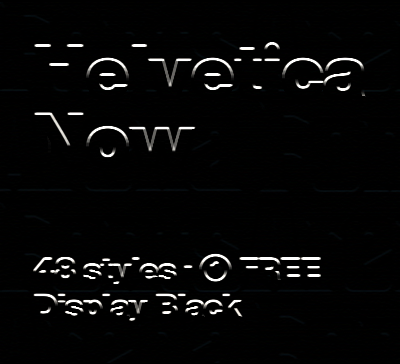

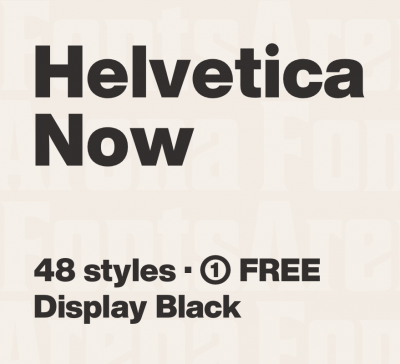

In [0]:
# Initial Horizontal Edge Detection
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


# New Horizontal Edge Detection
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

cv2_imshow(image)

## Final Horizontal Edge Detection
Combining both the above vertical edge detected images, so that Whole vertical edges are detected.



*   **Without background edges**



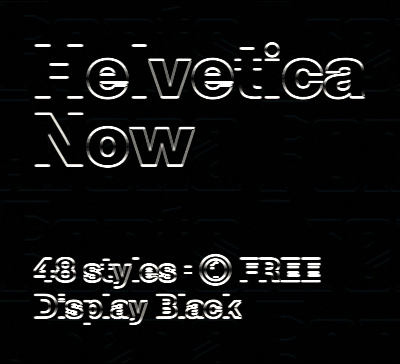

In [0]:
kernel1 = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
kernel2 = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)



*   **With background Edges**
<br/>
Read about Sobel operator, where it weighs the edges so that edges will be more prominent than the original image.
We should try that if we want to see the edges of background texts as well.




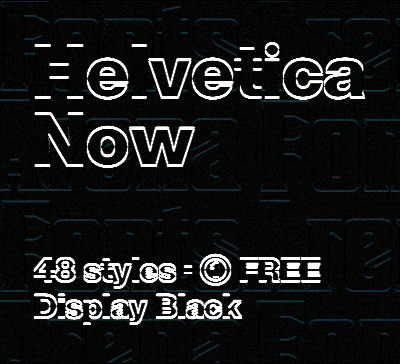

In [0]:
# As per the sobel concept, I tried to increase the weight of middle values in the kernel
kernel1 = np.float32([[1,10,1],[0,0,0],[-1,-10,-1]])
kernel2 = np.float32([[-1,-10,-1],[0,0,0],[1,10,1]])


dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)

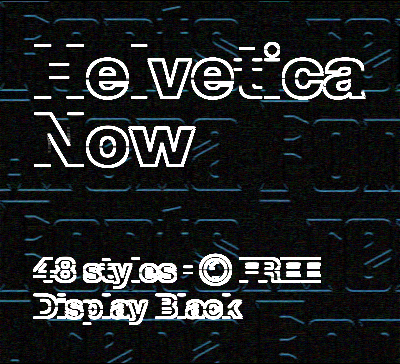

In [0]:
# Trying my own way, where increasing values of all pixels resulting in highlighting the edges
kernel1 = np.float32([[10,10,10],[0,0,0],[-10,-10,-10]])
kernel2 = np.float32([[-10,-10,-10],[0,0,0],[10,10,10]])


dst1 = cv2.filter2D(image,-1,kernel1)
dst2 = cv2.filter2D(image,-1,kernel2)
cv2_imshow(dst1+dst2)

## Conclusion on Horizontal Edges Detectors


*   When we use Pre-witt operator matrix where alues are in range of -1 to 1, we used to get prominent edges visible in the image. 
*  There are two verticals we can get by swapping -1 and 1, one with transition from dark to bright pixels and other viceversa. Combining both images gives us a full vertical edge detected image.
* Sobel operator is also useful when we have to highligh the edges.
* Combining ideas of Prewitt and Sobel Operator, Played with all values and it gave more highlight to the vertical edges including background texts.



## References


*   https://en.wikipedia.org/wiki/Prewitt_operator
*   https://www.tutorialspoint.com/dip/sobel_operator.htm
*   https://www.youtube.com/watch?v=XuD4C8vJzEQ
*   https://www.youtube.com/watch?v=am36dePheDc


# 45 + 135 Degree Edge Detector

## The Journey

As I have understood how vertical and horizontal edge detection works, 45 degree seems to be easy. <br/>A diagonal matrix with positive values and all other negative values should give the result

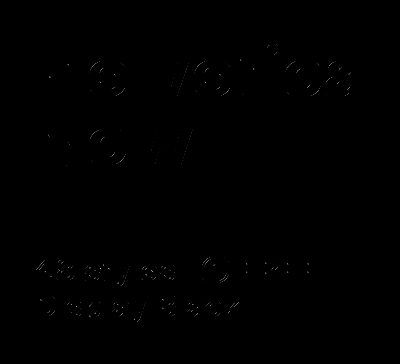

In [0]:
kernel = np.float32([[1.5,-1,-1],[-1,1.5,-1],[-1,-1,1.5]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Observation** : Need to highligh edges more, so increasing the weight

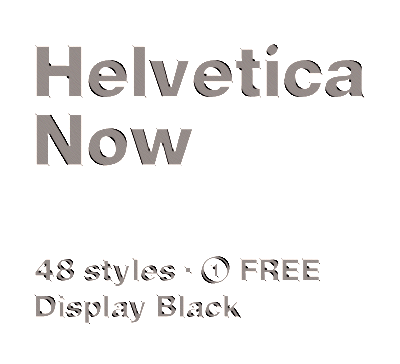

In [0]:
kernel = np.float32([[3,-1,-1],[-1,3,-1],[-1,-1,3]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Observation** : increased too much, as it is highlighting unwanted edges as well

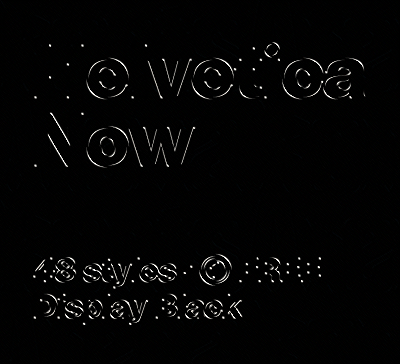

In [0]:
kernel = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Final 45 + 135 Degree Edge Detection
Using above observation for 45 degree and 135 degree edge identification

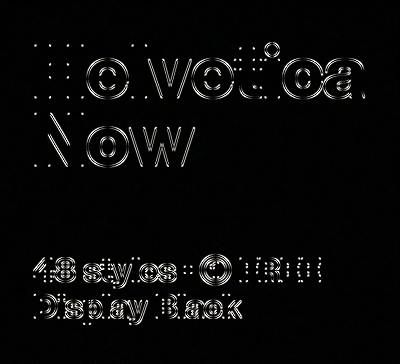

In [0]:
kernel_45 = np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
dst_45 = cv2.filter2D(image,-1,kernel_45)
kernel_135 = np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
dst_135 = cv2.filter2D(image,-1,kernel_135)
cv2_imshow(dst_45+dst_135)

## Conclusion on 45 Degree Edges Detectors

* Applying positive values digonally highlighted 45 & 135 degree

# Blur Kernel

## The Journey

Read few articles and understood that it's about fraction values in matrix that makes the blur effect. It actually reduces the pixel values in and around which gives a blur effect for the image.


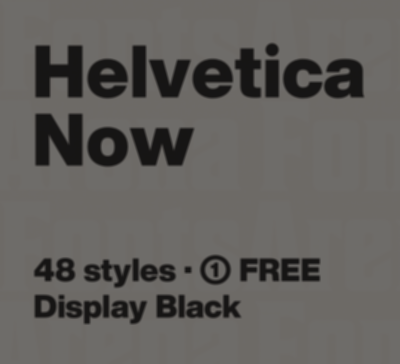

In [0]:
# Trying with same value all over matrix
kernel = np.float32([[0.05,0.05,0.05],[0.05,0.05,0.05],[0.05,0.05,0.05]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Observation** : Overall it is dark as the pixel value is reduced too much

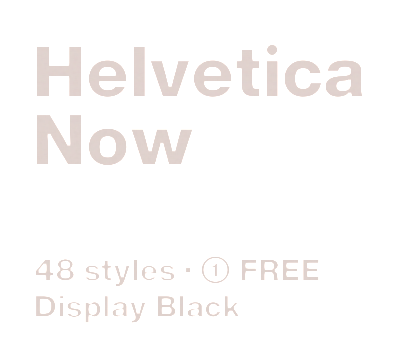

In [0]:
# decreased the rate of pixel reduction
kernel = np.float32([[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Observation** : Overall it is bright as the pixel value is not reduced enough

## Final Blur Kernel

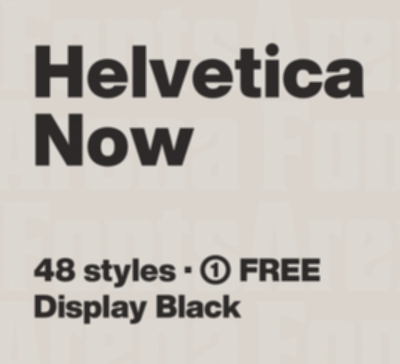

In [0]:
kernel = np.float32([[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Obersvation** : This looks blurred without losing color details much.<br/> 
**Note** : Some articles suggest of considering more values on top and side pixels and different values on diagonal edge pixels. Somehow, I felt it is fetching wrong blur results so I have not used it

## Conclusion on Blur Kernel

*   Blurring is a process of pixel averaging of neighbors
*   `3*3 kernel blur performs good in 0.1 (1/9*1) matrix value`
*   `Using a kernel of bigger matrix dimension, we can have more blur effect without losing color details`



## Reference


*   http://www.cs.ubc.ca/labs/scl/spot/guide_convolution2.html
*   http://cse3521.artifice.cc/image-convolutions-transformations.html
*   http://setosa.io/ev/image-kernels/



# Sharpen Kernel

It's opposite of Blur kernel. Instead of averaging the around pixel values, we should difference it while sharpening the image.


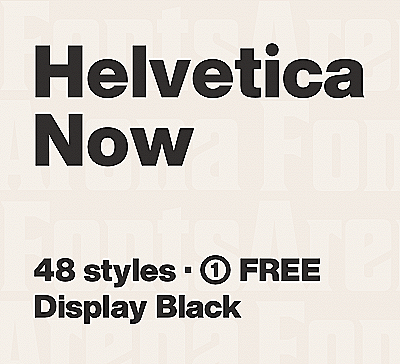

In [0]:
# Trying with same value all over matrix
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

**Observation** : Overall it is bright as the pixel value is not reduced enough

## Conclusion on Sharpren Kernel


*   highlighting the centre pixel overlappin with kernel matrix and reducing nehgbour pixel gives the sharpening effect



## Reference


*   http://www.cs.ubc.ca/labs/scl/spot/guide_convolution2.html
*   http://cse3521.artifice.cc/image-convolutions-transformations.html
*   http://setosa.io/ev/image-kernels/



# Identity Kernel

Kernel which gives the same image when it gets convolved.


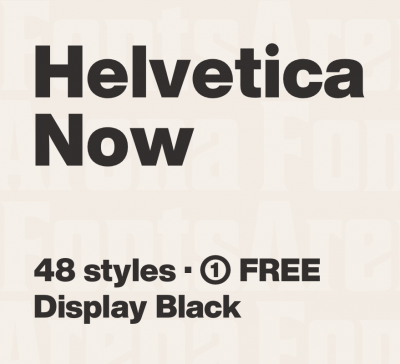

In [0]:
# Trying with same value all over matrix
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

## Conclusion on Identify Kernel


*   Applying a centre value only as 1 in 3*3 matrix makes it identity which means it doesn't consider any neighbor pixels, only it takes the anchor pixel

